In [1]:
import pandas as pd
import numpy as np
from Higgs.tools.ImplementationUtils import (
    implementChannelLimit,
    fromHB5Table1,
    readHEPDataCsv,
)
from Higgs import bounds as HB
from Higgs import predictions as HP
from Higgs import Predictions
from Higgs.tools.LimitValidation import validateChannelLimit
import os, sys

sys.path.insert(0, os.path.dirname(os.path.dirname(os.getcwd())))
import MassResolutions as resolution


# ATLAS 13TeV LHC

## `bbH>bb` [1907.02749](https://arxiv.org/abs/1907.02749)


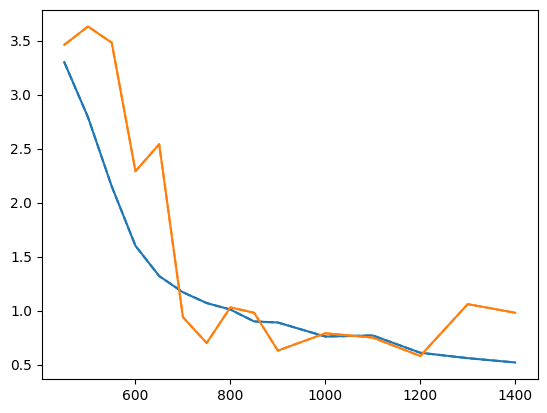

Looks good. Saving this to bbH_LHC13_ATLAS_28.json


In [2]:
df = fromHB5Table1("2749_ATL_Hb-bbbb_27.8fb-1", "ATLAS")
limitFile = implementChannelLimit(
    "1907.02749",
    {"channels": [["bbH", "bb"]]},
    "Aux Tab 2",
    df,
    massResolution=resolution.bb["highMass"],
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)


# ATLAS 8TeV LHC

## `VH>bb` full run 1[1409.6212](https://arxiv.org/abs/1409.6212)

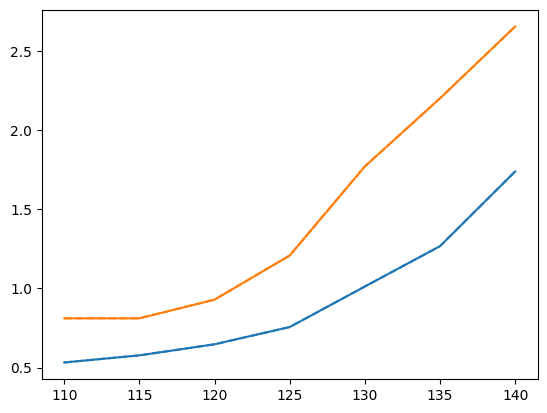

Looks good. Saving this to HV_LHC8_ATLAS_25.json
using effective coupling input for SM-normalized limit


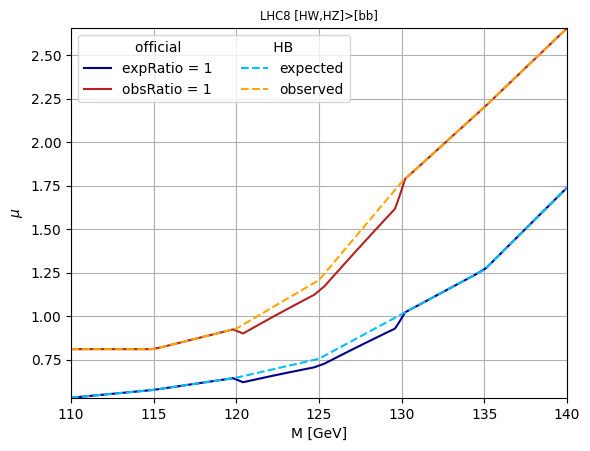

In [3]:
df = pd.DataFrame(
    data={
        "m": [110, 115, 120, 125, 130, 135, 140],
        "obs": [0.811, 0.811, 0.929, 1.208, 1.771, 2.201, 2.655],
        "exp": [0.532, 0.577, 0.647, 0.756, 1.012, 1.267, 1.739],
    }
)
limitFile = implementChannelLimit(
    "1409.6212",
    {"channels": [["HZ", "bb"], ["HW", "bb"]]},
    "Fig. 19",
    df,
    luminosity=4.7 + 20.3,
    massResolution=resolution.bb["medMass"],
    normalization={"reference": "SMHiggsInterp", "process": "signal"},
    constraints={"modelLike": "SMHiggsInterp", "process": "signal"},
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)
